## Описание проекта
Фермер хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Необходимо разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

## Описание данных

### Файл ferma_main.csv содержит данные о стаде фермера на текущий момент

- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
- Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
- Характеристика пастбища: `Тип пастбища`.
- Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.

### Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

### Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать!

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Шаг 1. Загрузите и изучите данные

In [2]:
ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal=",")
ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal=",")
cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal=",")

In [36]:
def primary_information(df):
    print(f"Размерность: {df.shape}")
    display(df.info())
    display(df.head())

#### Первичная информация по ferma_main

In [37]:
primary_information(ferma_main)

Размерность: (628, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    int64  
 1   milk_yield           628 non-null    int64  
 2   energy_feed_unit     628 non-null    float64
 3   raw_protein          628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   pasture_type         628 non-null    object 
 7   dad_breed            628 non-null    object 
 8   fat_content          628 non-null    float64
 9   protein              628 non-null    float64
 10  taste                628 non-null    object 
 11  age                  628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


None

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_content,protein,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


#### Первичная информация по cow_buy

In [38]:
primary_information(ferma_dad)

Размерность: (629, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


#### Первичная информация по ferma_main

In [35]:
primary_information(cow_buy)

(20, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                20 non-null     object 
 1   pasture_type         20 non-null     object 
 2   dad_breed            20 non-null     object 
 3   dad_name             20 non-null     object 
 4   current_fat_content  20 non-null     float64
 5   current_protein      20 non-null     float64
 6   age                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

,breed,pasture_type,dad_breed,dad_name,current_fat_content,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Приведем названия столбцов к единому стилю:

In [5]:
ferma_main = ferma_main.rename(columns={
    'Удой, кг' : 'milk_yield',
    'ЭКЕ (Энергетическая кормовая единица)' : 'energy_feed_unit',
    'Сырой протеин, г' : 'raw_protein',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'dad_breed',
    'Жирность,%': 'fat_content',
    'Белок,%': 'protein',
    'Вкус молока': 'taste',
    'Возраст': 'age'
})

In [6]:
ferma_dad = ferma_dad.rename(columns={'Имя Папы' : 'dad_name'})

In [7]:
cow_buy = cow_buy.rename(columns={
    'Порода' : 'breed',
    'Тип пастбища' : 'pasture_type',
    'порода папы_быка' : 'dad_breed',
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'current_fat_content',
    'Текущий_уровень_белок,%': 'current_protein',
    'Возраст': 'age'
})

## Шаг 2. Предобработка данных

### Проверим датасеты на наличие пропусков

In [8]:
ferma_main.isna().sum()

id                     0
milk_yield             0
energy_feed_unit       0
raw_protein            0
sugar_protein_ratio    0
breed                  0
pasture_type           0
dad_breed              0
fat_content            0
protein                0
taste                  0
age                    0
dtype: int64

In [9]:
ferma_dad.isna().sum()

id          0
dad_name    0
dtype: int64

In [10]:
cow_buy.isna().sum()

breed                  0
pasture_type           0
dad_breed              0
dad_name               0
current_fat_content    0
current_protein        0
age                    0
dtype: int64

Пропуски отсутствуют

#### В поле ```Тип пастбища``` у таблиц ```ferma_main``` и ```cow_buy``` отличяается регистр. Приведем все к нижнему регистру

In [11]:
ferma_main.pasture_type = ferma_main.pasture_type.str.lower()

### Проверим наличие дубликатов и удалим их:

In [12]:
ferma_main[ferma_main.duplicated()]

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_content,protein,taste,age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [13]:
ferma_main.drop_duplicates(ignore_index=True, inplace=True)

In [14]:
ferma_dad[ferma_dad.duplicated()]

,id,dad_name


Дубликаты в данных об именах пап каждой коровы в стаде фермера отсутствуют

In [15]:
cow_buy[cow_buy.duplicated()]

,breed,pasture_type,dad_breed,dad_name,current_fat_content,current_protein,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Дубликаты в данных о коровах «ЭкоФермы» присутствуют, но здесь нет уверенности, что это одни и те же сущности

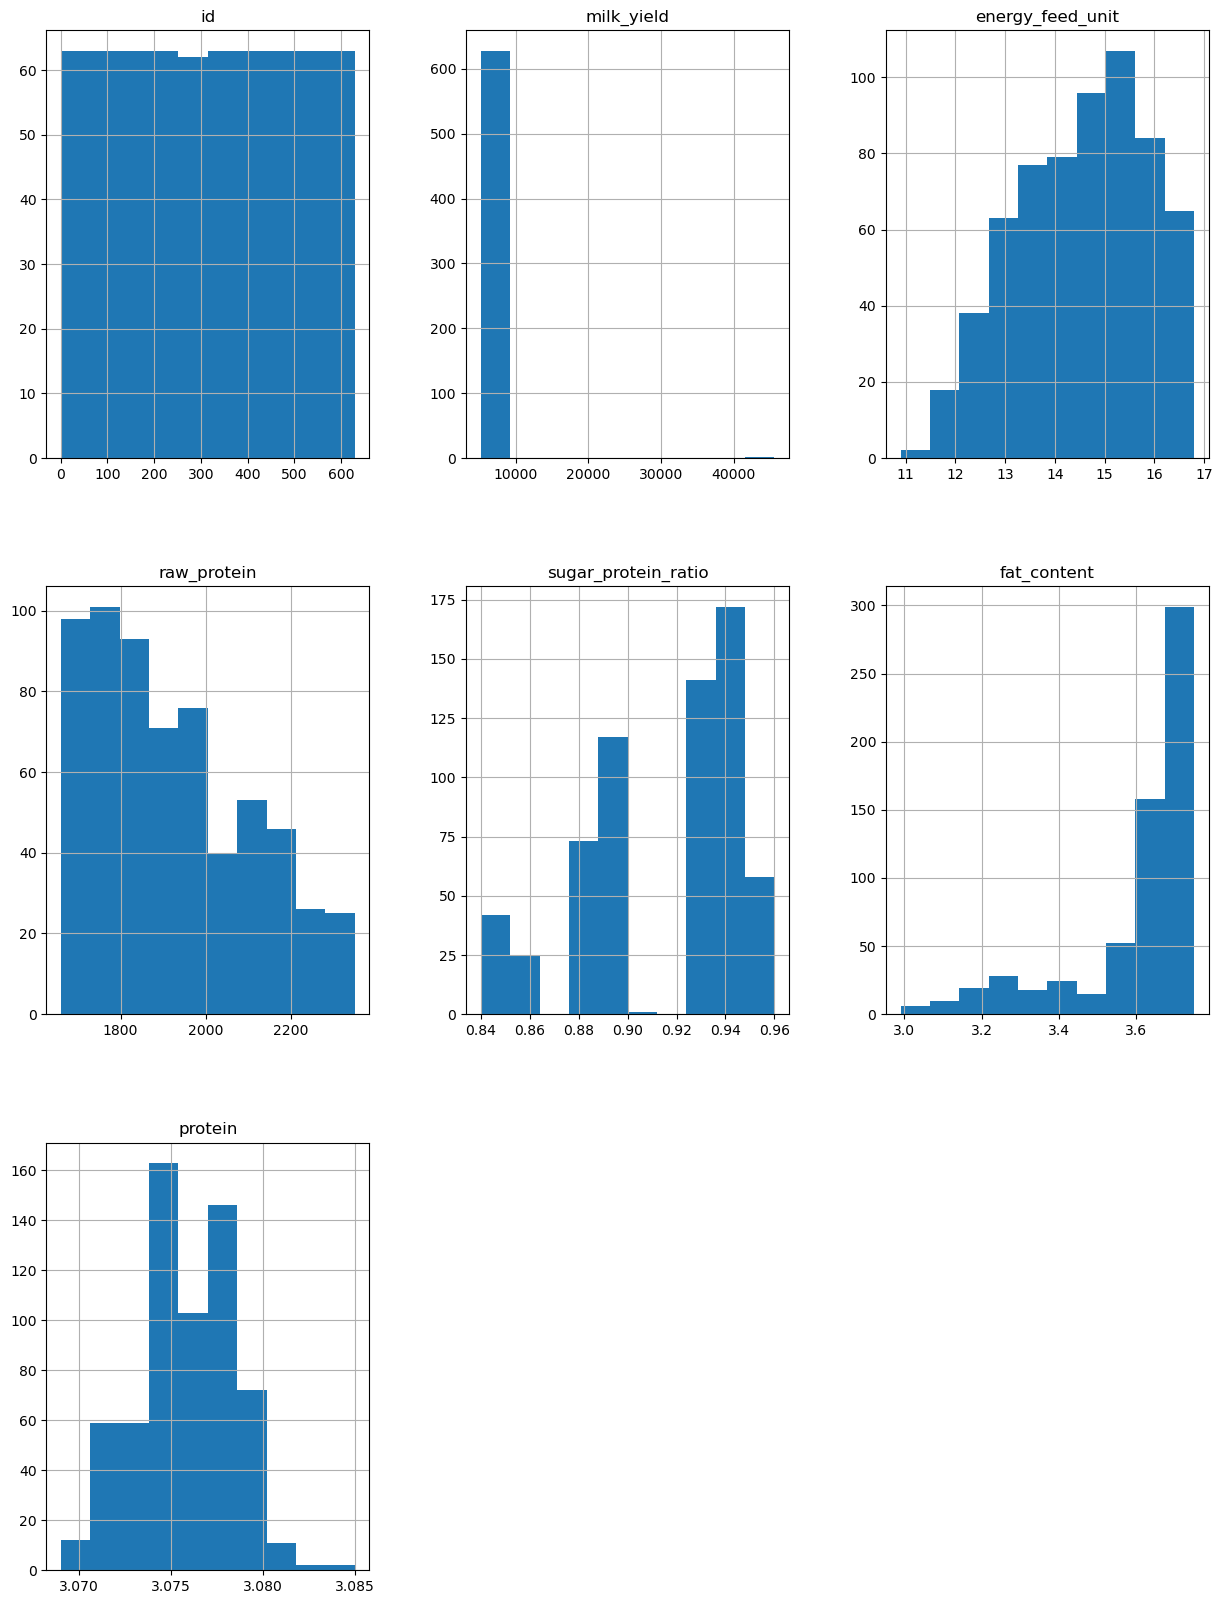

In [16]:
ferma_main.hist(figsize=(15, 20));

По гистограммам видим, что удой похоже имеет выбросы, которые искажают данные, построим ящик с усами, чтобы в этом убедится

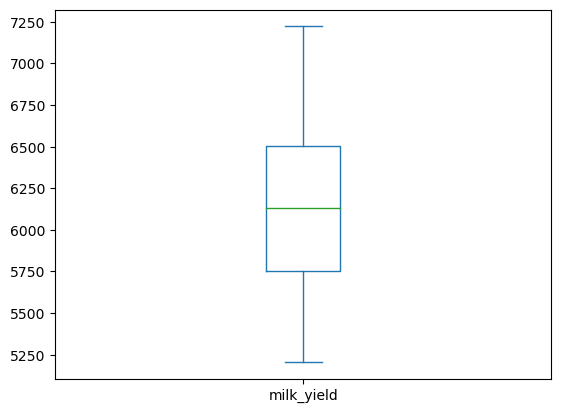

In [69]:
ferma_main['milk_yield'].plot(kind='box');

Действительно, наблюдаем аномальный выброс в поле milk_yield. Лучше его удалить

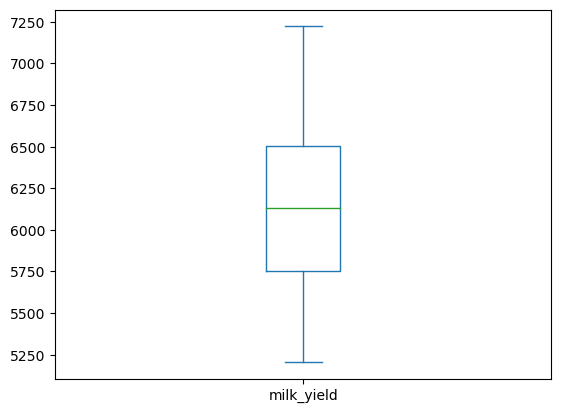

In [30]:
ferma_main.drop(ferma_main[ferma_main.milk_yield > 20000].index, inplace=True)
ferma_main.milk_yield.plot(kind='box');

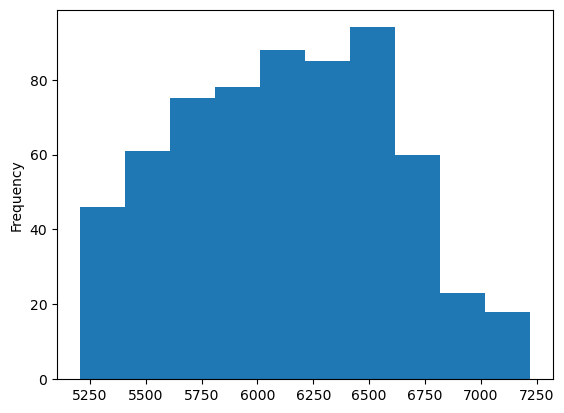

In [31]:
ferma_main.milk_yield.plot(kind='hist');

Поля ```milk_yield```,
    ```energy_feed_unit```, 
    ```raw_protein```, 
   ```protein```
   имеют распределения близкие к нормальному. В поле ```sugar_protein_ratio``` видно сгрупированно в три группы, около значений ```0.85```, ```0.90```, ```0.95```. Поле ```fat_content``` имеет в распределении два колкола.

Построим ящики с усами для остальных количественных перемнных

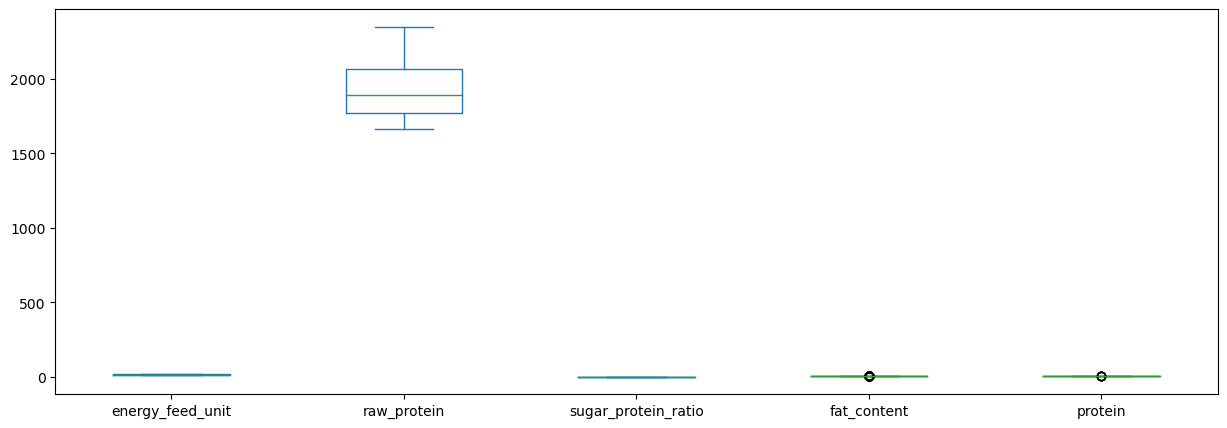

In [40]:
ferma_main[[
    'energy_feed_unit', 
    'raw_protein', 
    'sugar_protein_ratio', 
    'fat_content', 
    'protein']].plot(kind='box', figsize=(15, 5));

Видно, что в полях ```fat_content``` и ```protein``` есть выбросы. Проанализируем эти признаки поподробнее:

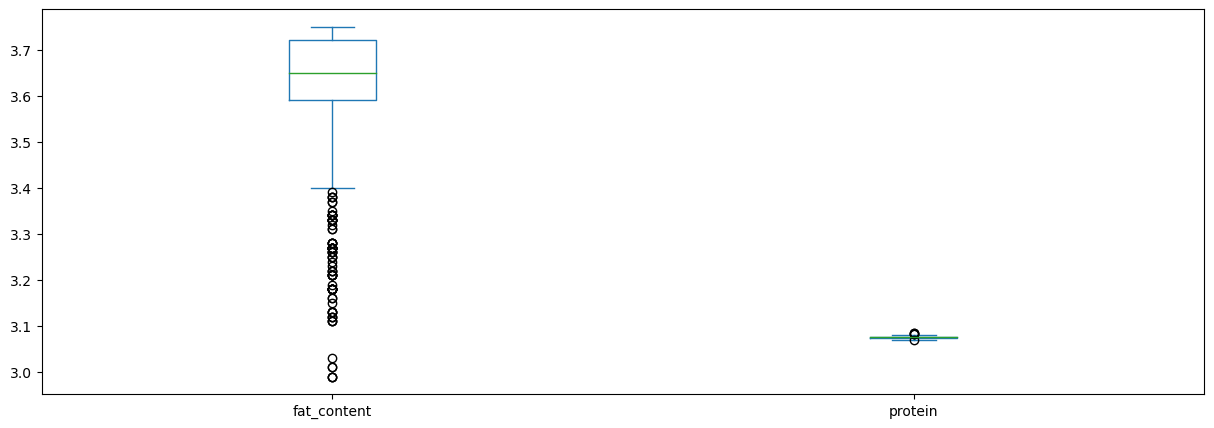

In [21]:
ferma_main[[
    'fat_content', 
    'protein']].plot(kind='box', figsize=(15, 5));

Аномальными эти выбросы назвать нельзя, посмотрим на ситуацию в таблице cow_buy

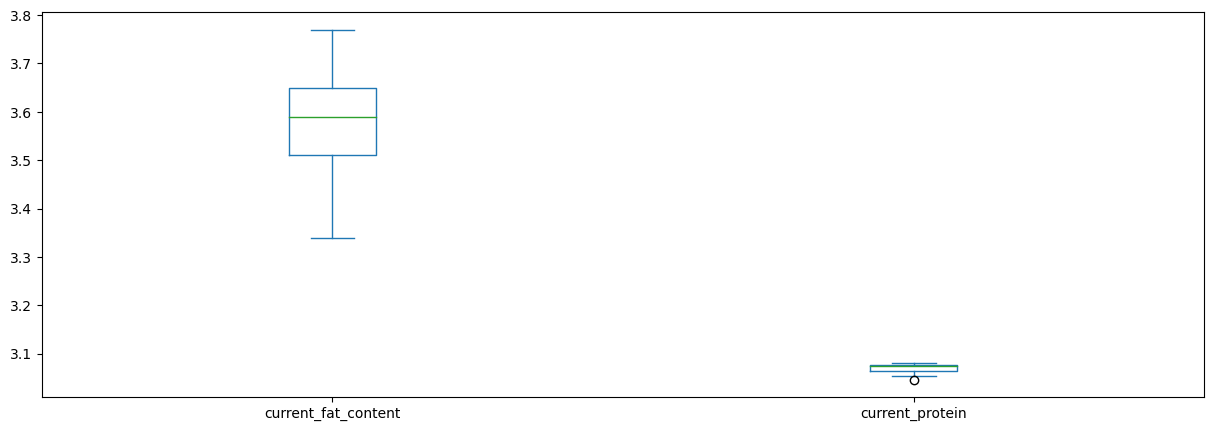

In [22]:
cow_buy[['current_fat_content', 'current_protein']].plot(kind='box', figsize=(15, 5));

 Посмотрим на категориальные признаки:

In [23]:
def show_pie(df, columns, column_titles, main_title):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), sharey=True, figsize=(18, 6))
    if len(columns) == 1:
        (
            df[columns[0]].value_counts().plot.pie(autopct='%1.f%%', legend=False,
                wedgeprops = {"edgecolor" : "white", 
                              'linewidth': 2, 
                              'antialiased': True})
        )
        axes.title.set_text(column_titles[0])
    else:
        idx = 0
        for column in columns:    
            (
                df[column].value_counts().plot.pie(ax=axes[idx], autopct='%1.f%%', legend=False,
                    wedgeprops = {"edgecolor" : "white", 
                                  'linewidth': 2, 
                                  'antialiased': True})
            )
            axes[idx].title.set_text(column_titles[idx])
            idx+=1
    fig.suptitle(main_title, fontsize=30)

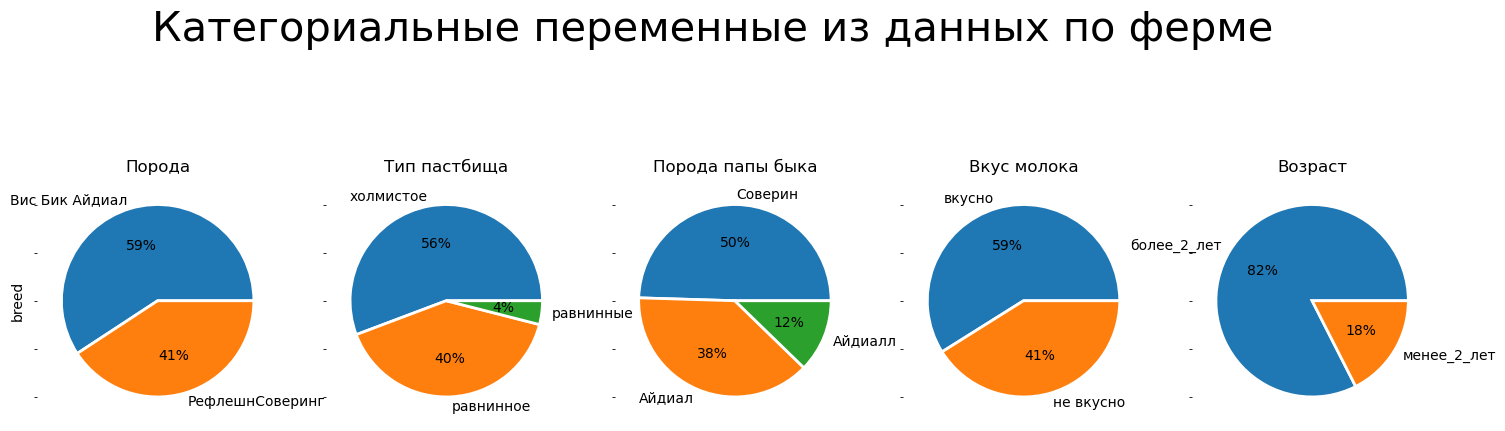

In [24]:
show_pie(
    ferma_main, 
    ['breed', 'pasture_type', 'dad_breed', 'taste', 'age'], 
    ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст'],
    'Категориальные переменные из данных по ферме'
)

Устраним неявные дубликаты в полях ```pasture_type``` и ```dad_breed```

In [25]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('равнинные', 'равнинное')
ferma_main['dad_breed'] = ferma_main['dad_breed'].replace('Айдиалл', 'Айдиал')

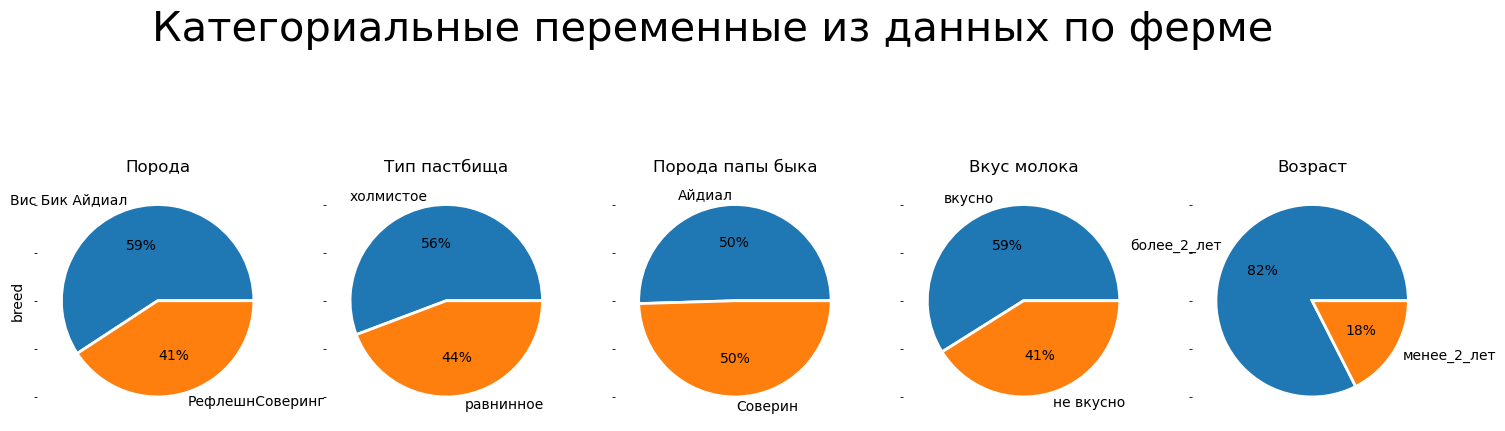

In [26]:
show_pie(
    ferma_main, 
    ['breed', 'pasture_type', 'dad_breed', 'taste', 'age'], 
    ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст'],
    'Категориальные переменные из данных по ферме'
)

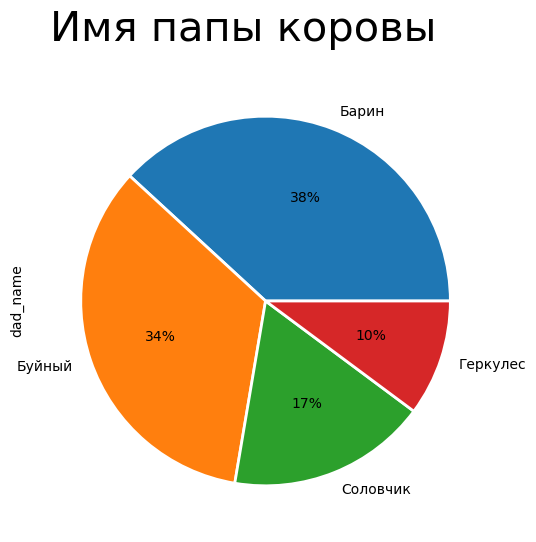

In [27]:
show_pie(ferma_dad, ['dad_name'], [''], 'Имя папы коровы')

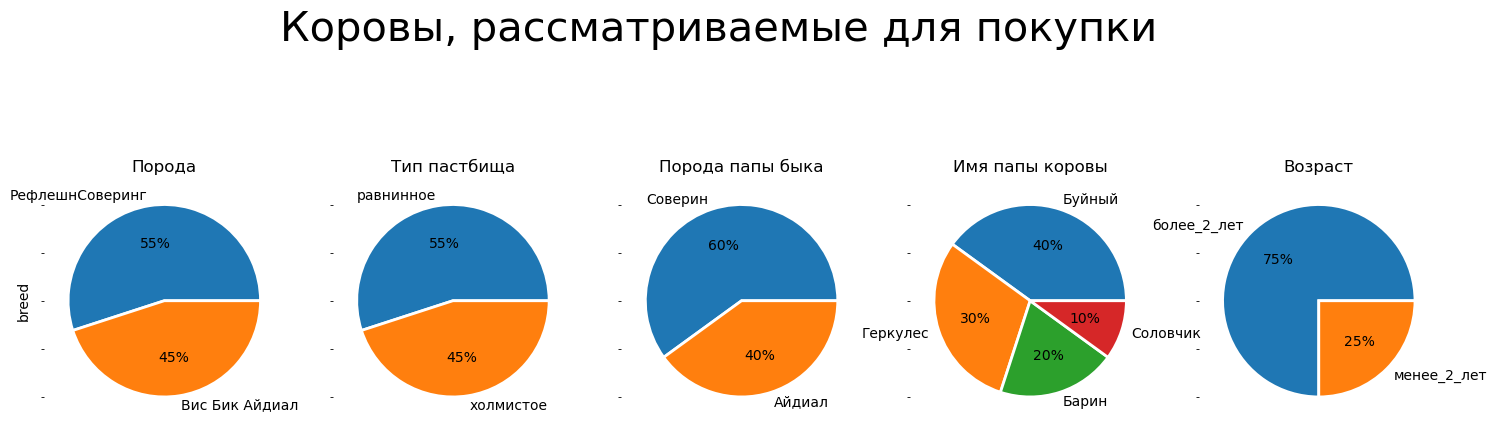

In [63]:
show_pie(
    cow_buy, 
    ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age'], 
    ['Порода', 'Тип пастбища', 'Порода папы быка', 'Имя папы коровы', 'Возраст'],
    'Коровы, рассматриваемые для покупки')

### Шаг 4. Проведите корреляционный анализ признаков в датасете ferma_main.csv

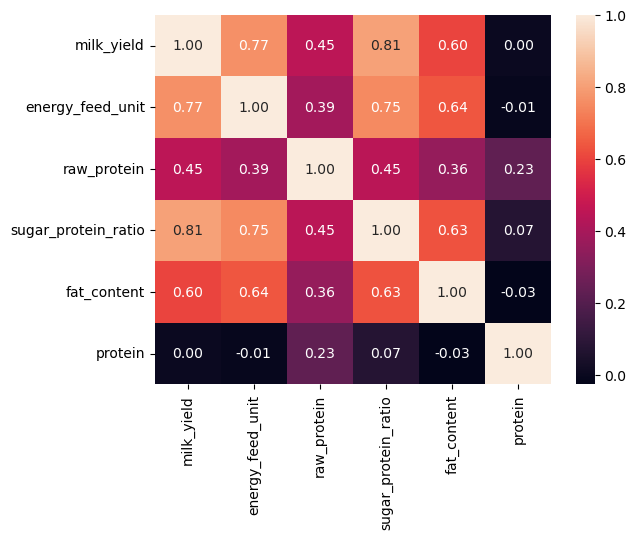

In [68]:
sns.heatmap(ferma_main.loc[:, ferma_main.columns!='id'].corr(), annot=True, fmt='.2f');

Видим 

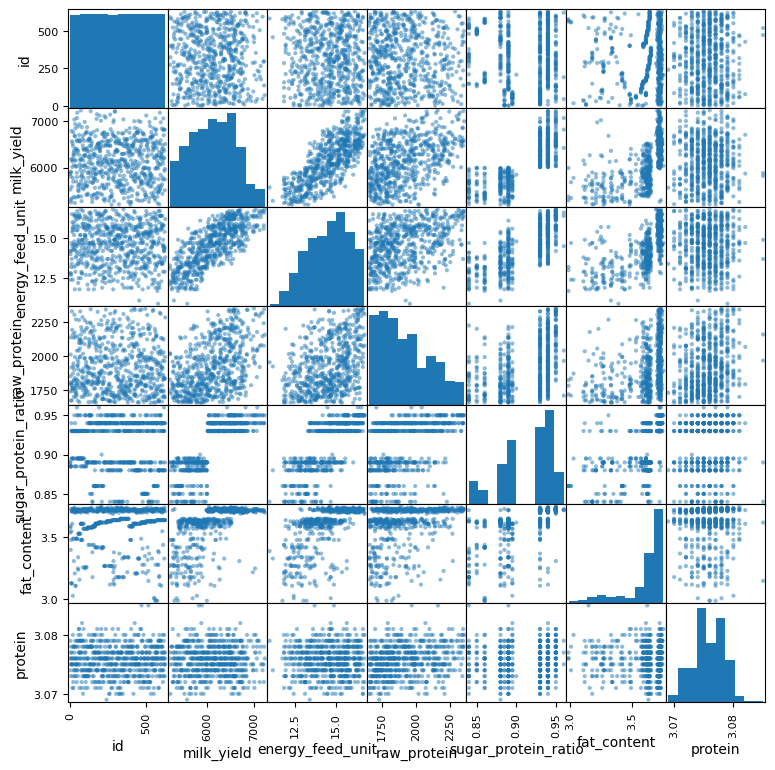

In [29]:
pd.plotting.scatter_matrix(ferma_main, figsize=(9, 9));scatterplot

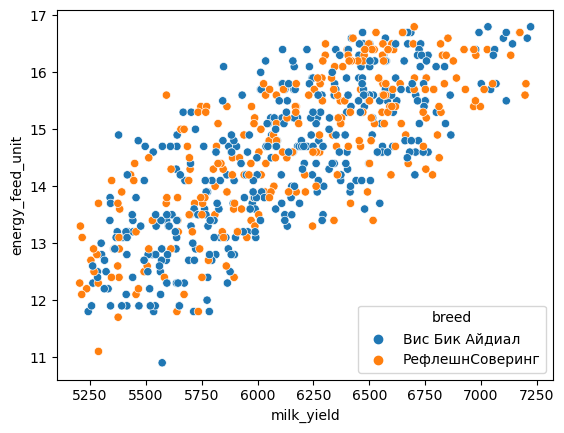

In [72]:
sns.scatterplot(data=ferma_main, x="milk_yield", y="energy_feed_unit", hue="breed");

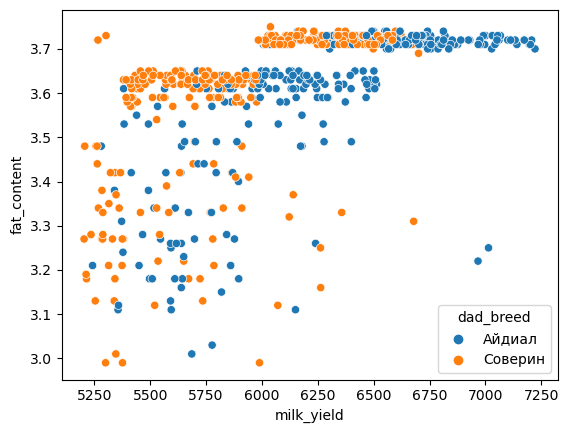

In [87]:
sns.scatterplot(data=ferma_main, x="milk_yield", y="fat_content", hue="dad_breed"); # 'pasture_type', 'dad_breed', 'dad_name', 'age'], 